In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('shein_footwear_clean.csv')

In [9]:
df

,name,link,price_usd,mark_price_usd,star_rating,colour,seller_name,review_count,sku_id,hero_image
0,"Women's Casual Sports Shoes, Fashionable Versa...",https://us.shein.com/Women-s-Casual-Sports-Sho...,19.40,24.40,4.83,Khaki,Womens Shoes,77,sx2305270713671620,//img.ltwebstatic.com/images3_spmp/2023/12/19/...
1,2024 New Spring/Autumn Women Breathable Mesh H...,https://us.shein.com/2024-New-Spring-Autumn-Wo...,14.90,18.80,0.00,NaN,Limeiya Factory,0,sx2404088145930048,//img.ltwebstatic.com/images3_pi/2024/04/17/55...
2,Women's Casual Slip-on Flat Skate Shoes With A...,https://us.shein.com/Women-s-Casual-Slip-on-Fl...,7.50,18.80,4.92,NaN,Dawanfu,66,sx2309025401152825,//img.ltwebstatic.com/images3_pi/2023/09/04/a0...
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",https://us.shein.com/Women-Mesh-Breathable-Cas...,12.06,21.30,0.00,Purple,NaN,41,sx2308191847675463,//img.ltwebstatic.com/images3_spmp/2023/08/19/...
4,Women's Fashionable Casual Sneakers,https://us.shein.com/Women-s-Fashionable-Casua...,13.53,17.05,0.00,Grey,NaN,100+,sx2307234044444164,//img.ltwebstatic.com/images3_spmp/2023/12/31/...
...,...,...,...,...,...,...,...,...,...,...
894,Women's Spring And Autumn Fashionable Square F...,https://us.shein.com/Women-s-Spring-And-Autumn...,6.16,19.60,0.00,Brown,NaN,100+,sx2310311471064114,//img.ltwebstatic.com/images3_spmp/2023/10/31/...
895,Women's Fashionable Casual Sports Color Block ...,https://us.shein.com/Women-s-Fashionable-Casua...,22.22,27.94,0.00,Blue and White,NaN,500+,sx2305239441197897,//img.ltwebstatic.com/images3_pi/2023/08/09/af...
896,1pair Super Soft Shoes Front Insole Sponge Hal...,https://us.shein.com/1pair-Super-Soft-Shoes-Fr...,1.40,2.10,0.00,Apricot,NaN,1000+,sx2306092525562624,//sheinsz.ltwebstatic.com/she_dist/images/bg-g...
897,Summer Men's Hiking Aqua Shoes With Thick Sole...,https://us.shein.com/Summer-Men-s-Hiking-Aqua-...,33.96,56.60,0.00,Grey,NaN,1,st2308018795877072,//img.ltwebstatic.com/images3_spmp/2023/08/01/...


In [10]:
df.isnull()
#Detect missing vaules

,name,link,price_usd,mark_price_usd,star_rating,colour,seller_name,review_count,sku_id,hero_image
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
894,False,False,False,False,False,False,True,False,False,False
895,False,False,False,False,False,False,True,False,False,False
896,False,False,False,False,False,False,True,False,False,False
897,False,False,False,False,False,False,True,False,False,False


In [11]:
# Replace missing values in 'colour' and 'seller_name' with 'Unknown'
df['colour'].fillna('Unknown', inplace=True)
df['seller_name'].fillna('Unknown', inplace=True)

# Replace 0.00 in 'star_rating' with the mean of the non-zero ratings
mean_rating = df[df['star_rating'] > 0]['star_rating'].mean()
df['star_rating'].replace(0.00, mean_rating, inplace=True)

# Replace missing URLs and images with placeholders
df['link'].fillna('no_url', inplace=True)
df['hero_image'].fillna('no_image', inplace=True)

# Convert 'review_count' to numeric, replacing '100+', '500+', etc. with appropriate integers
df['review_count'] = df['review_count'].apply(lambda x: int(x.replace('+', '')) if isinstance(x, str) and '+' in x else int(x))

# Check the DataFrame
print(df)

                                                  name  \
0    Women's Casual Sports Shoes, Fashionable Versa...   
1    2024 New Spring/Autumn Women Breathable Mesh H...   
2    Women's Casual Slip-on Flat Skate Shoes With A...   
3    Women Mesh Breathable Casual Shoes, Soft Non-S...   
4                  Women's Fashionable Casual Sneakers   
..                                                 ...   
894  Women's Spring And Autumn Fashionable Square F...   
895  Women's Fashionable Casual Sports Color Block ...   
896  1pair Super Soft Shoes Front Insole Sponge Hal...   
897  Summer Men's Hiking Aqua Shoes With Thick Sole...   
898  2pcs Letter Graphic Shoe Insoles, Fashion Apri...   

                                                  link  price_usd  \
0    https://us.shein.com/Women-s-Casual-Sports-Sho...      19.40   
1    https://us.shein.com/2024-New-Spring-Autumn-Wo...      14.90   
2    https://us.shein.com/Women-s-Casual-Slip-on-Fl...       7.50   
3    https://us.shein.com/W

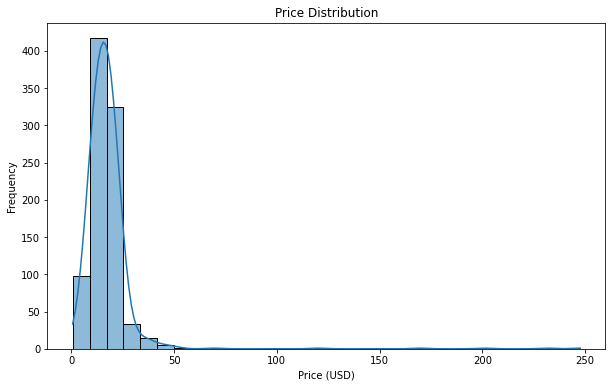

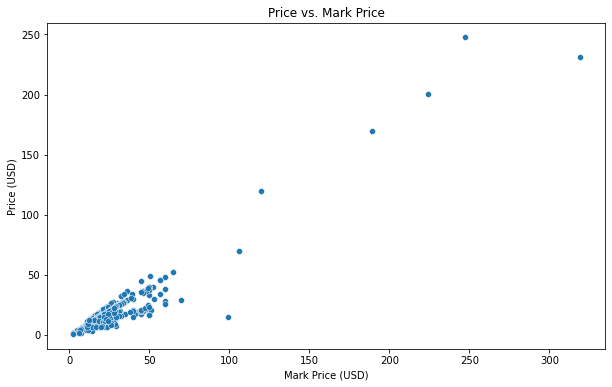

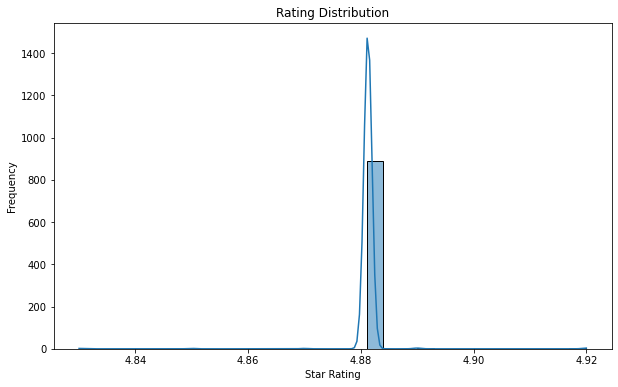

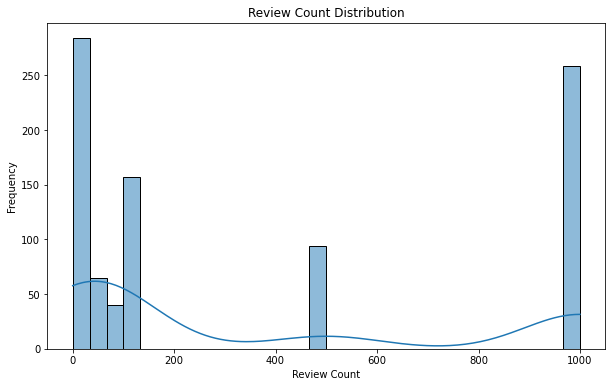

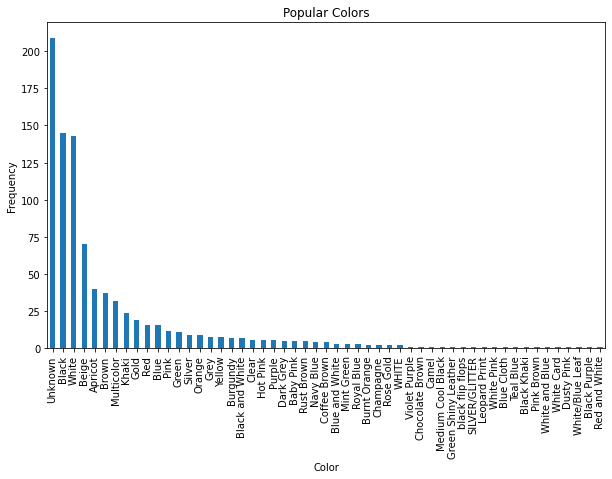

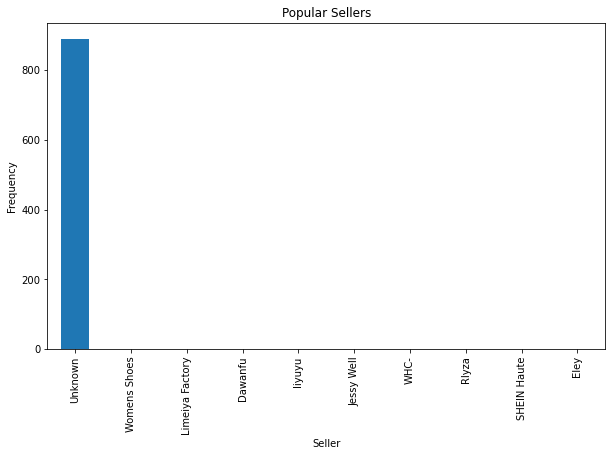

In [12]:
# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price_usd'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# 2. Price vs. Mark Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['mark_price_usd'], y=df['price_usd'])
plt.title('Price vs. Mark Price')
plt.xlabel('Mark Price (USD)')
plt.ylabel('Price (USD)')
plt.show()

# 3. Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['star_rating'], bins=30, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

# 4. Review Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['review_count'], bins=30, kde=True)
plt.title('Review Count Distribution')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

# 5. Popular Colors
plt.figure(figsize=(10, 6))
df['colour'].value_counts().plot(kind='bar')
plt.title('Popular Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.show()

# 6. Popular Sellers
plt.figure(figsize=(10, 6))
df['seller_name'].value_counts().plot(kind='bar')
plt.title('Popular Sellers')
plt.xlabel('Seller')
plt.ylabel('Frequency')
plt.show()


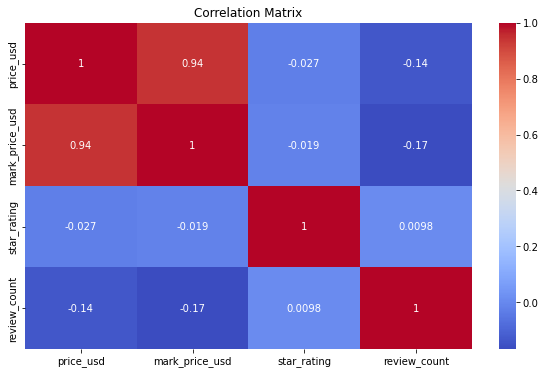

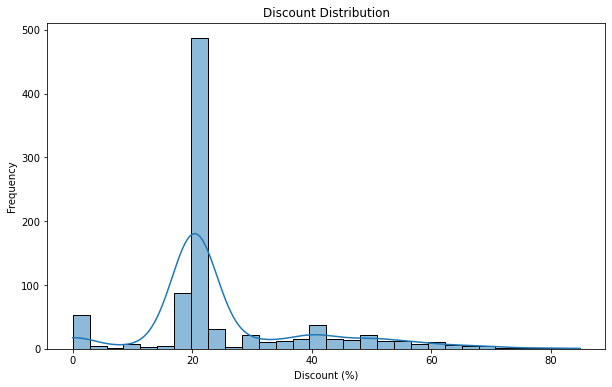

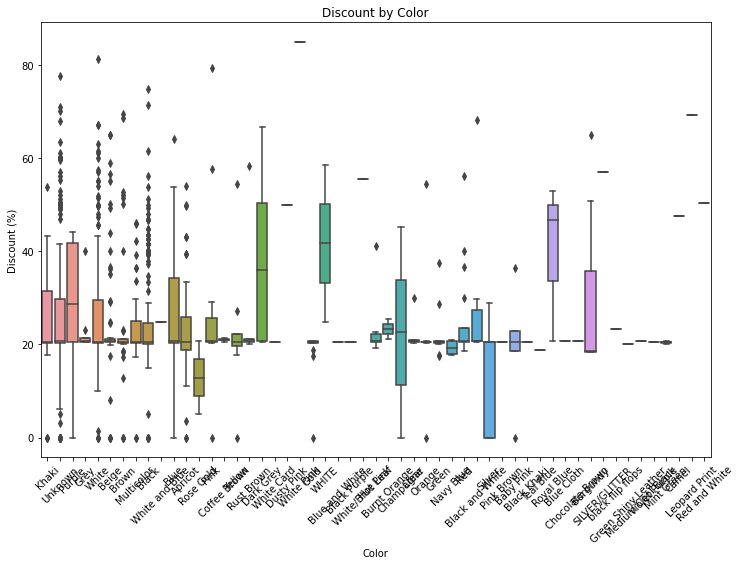

Top-rated Products:
                                                   name  star_rating  price_usd
2    Women's Casual Slip-on Flat Skate Shoes With A...      4.92000       7.50
671  Women's White Open Toe Cross Strap Fuzzy Slipp...      4.92000       5.30
135  Women's Casual Sneakers With Strong Wind & Com...      4.89000      17.30
358  Fashionable Women's Woven Straw Casual Vacatio...      4.89000       4.85
1    2024 New Spring/Autumn Women Breathable Mesh H...      4.88125      14.90
3    Women Mesh Breathable Casual Shoes, Soft Non-S...      4.88125      12.06
4                  Women's Fashionable Casual Sneakers      4.88125      13.53
5    Sporty Chunky Sneakers For Women, Letter Graph...      4.88125      21.30
6    Summer Women Casual Sports Shoes Slip-On Hollo...      4.88125      14.90
7    Comfortable Thick-Soled One Foot Slip-On Rocki...      4.88125      16.90


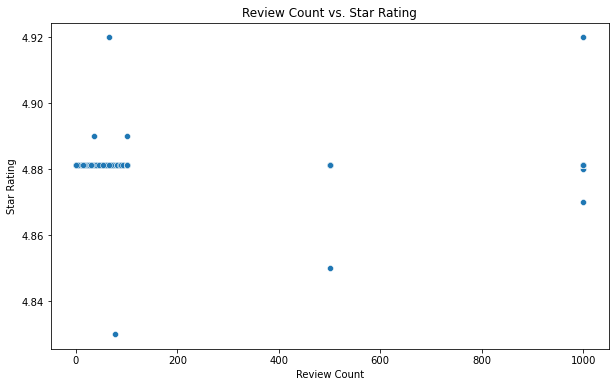

In [13]:
# 7. Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df[['price_usd', 'mark_price_usd', 'star_rating', 'review_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 8. Discount Analysis
df['discount'] = (df['mark_price_usd'] - df['price_usd']) / df['mark_price_usd'] * 100
plt.figure(figsize=(10, 6))
sns.histplot(df['discount'], bins=30, kde=True)
plt.title('Discount Distribution')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

# Discount by Color
plt.figure(figsize=(12, 8))
sns.boxplot(x='colour', y='discount', data=df)
plt.title('Discount by Color')
plt.xlabel('Color')
plt.ylabel('Discount (%)')
plt.xticks(rotation=45)
plt.show()

# 9. Top-rated Products
top_rated = df.nlargest(10, 'star_rating')[['name', 'star_rating', 'price_usd']]
print("Top-rated Products:\n", top_rated)

# 10. Review Impact on Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='star_rating', data=df)
plt.title('Review Count vs. Star Rating')
plt.xlabel('Review Count')
plt.ylabel('Star Rating')
plt.show()

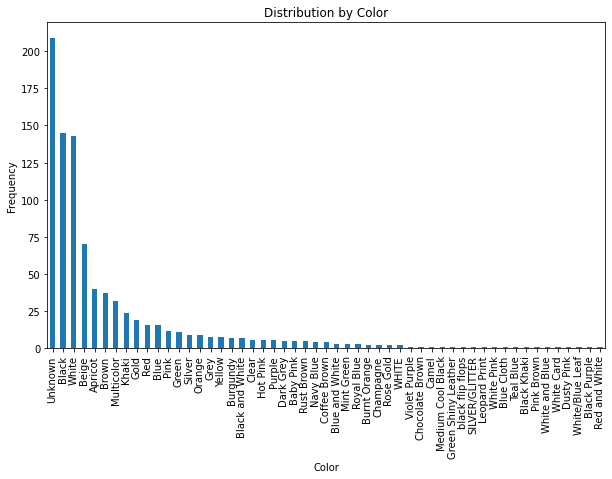

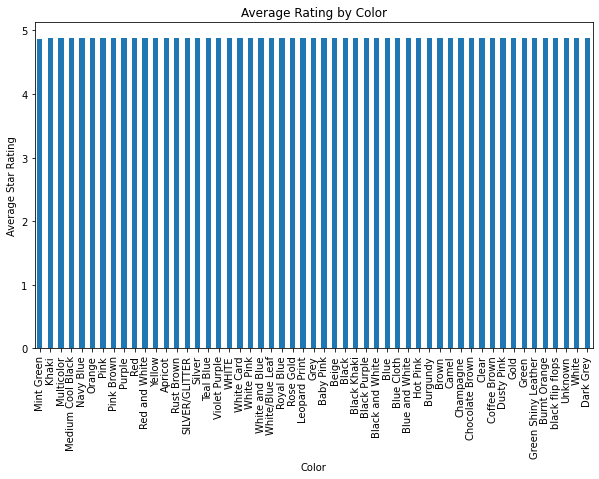

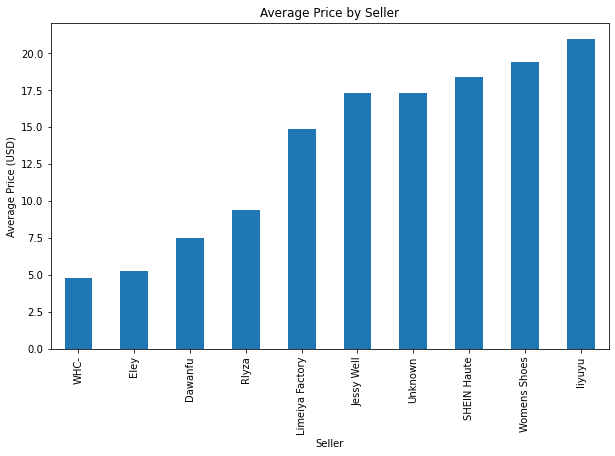

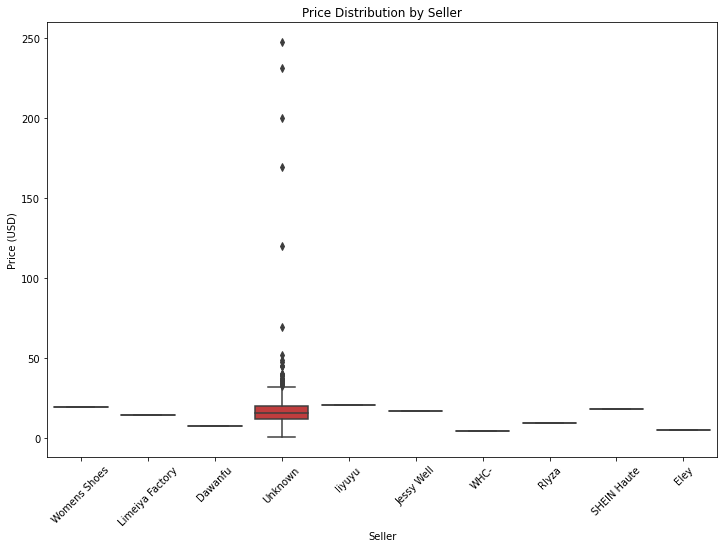

Most Reviewed Products:
                                                  name  review_count  \
11  Colorblock High-top Flat Sole Sporty Casual Sh...          1000   
15  Sporty Color Block Skating Shoes For Women, La...          1000   
16  Summer New Arrival Women's Large Size Slip-On ...          1000   
24  Women's Gray Fashionable Solid Color Slip-on S...          1000   
31  Women Beige Buckle Decor Flat Sandals, Open To...          1000   
50  Women's Stylish Soft And Comfortable Outdoor R...          1000   
53                          Lace Up High Top Sneakers          1000   
72  Women's Spring & Autumn Round Toe Lace-up Soli...          1000   
75  Women's Casual Comfortable Vacation Style Snea...          1000   
81  Women's Fashionable Casual Elastic Slip-On Sne...          1000   

    star_rating  
11      4.88000  
15      4.88125  
16      4.88125  
24      4.88125  
31      4.88125  
50      4.88125  
53      4.88125  
72      4.88125  
75      4.88125  
81      4.881

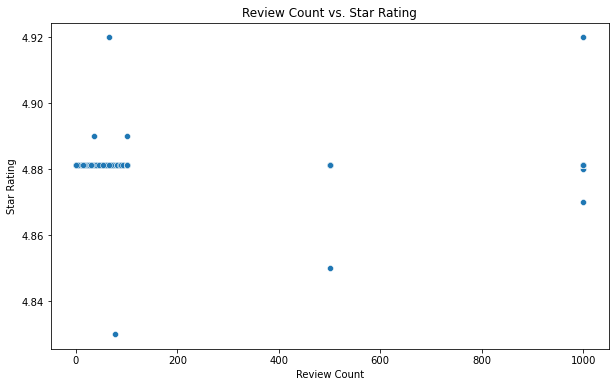

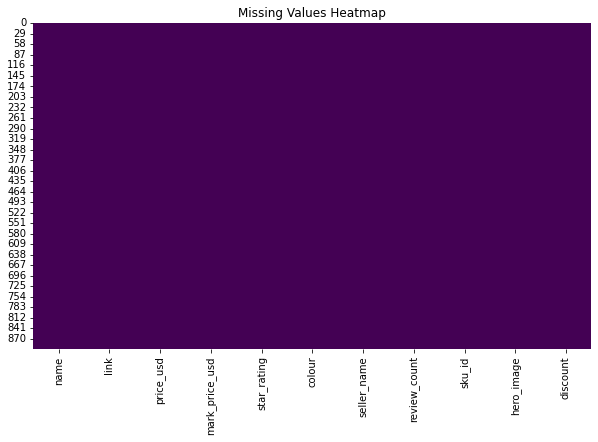

In [14]:
plt.figure(figsize=(10, 6))
df['colour'].value_counts().plot(kind='bar')
plt.title('Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.show()

# Average Rating by Color
avg_rating_by_color = df.groupby('colour')['star_rating'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_rating_by_color.plot(kind='bar')
plt.title('Average Rating by Color')
plt.xlabel('Color')
plt.ylabel('Average Star Rating')
plt.show()

# 12. Average Price by Seller
avg_price_by_seller = df.groupby('seller_name')['price_usd'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_price_by_seller.plot(kind='bar')
plt.title('Average Price by Seller')
plt.xlabel('Seller')
plt.ylabel('Average Price (USD)')
plt.show()

# Price Distribution by Seller
plt.figure(figsize=(12, 8))
sns.boxplot(x='seller_name', y='price_usd', data=df)
plt.title('Price Distribution by Seller')
plt.xlabel('Seller')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

# 13. Most Reviewed Products
most_reviewed = df.nlargest(10, 'review_count')[['name', 'review_count', 'star_rating']]
print("Most Reviewed Products:\n", most_reviewed)

# Popularity vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='star_rating', data=df)
plt.title('Review Count vs. Star Rating')
plt.xlabel('Review Count')
plt.ylabel('Star Rating')
plt.show()

# 14. Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [15]:
df_encoded = pd.get_dummies(df, columns=['colour', 'seller_name'])

mean_rating = df_encoded[df_encoded['star_rating'] > 0]['star_rating'].mean()
df_encoded['star_rating'].replace(0.00, mean_rating, inplace=True)

In [16]:
df_encoded
#Categorical variables encoded into numerical values
# Function get dummies to convert categorical values
#Boolean series and replace Zero ratings with mean value

,name,link,price_usd,mark_price_usd,star_rating,review_count,sku_id,hero_image,discount,colour_Apricot,...,seller_name_Dawanfu,seller_name_Eley,seller_name_Jessy Well,seller_name_Limeiya Factory,seller_name_Rlyza,seller_name_SHEIN Haute,seller_name_Unknown,seller_name_WHC-,seller_name_Womens Shoes,seller_name_liyuyu
0,"Women's Casual Sports Shoes, Fashionable Versa...",https://us.shein.com/Women-s-Casual-Sports-Sho...,19.40,24.40,4.83000,77,sx2305270713671620,//img.ltwebstatic.com/images3_spmp/2023/12/19/...,20.491803,0,...,0,0,0,0,0,0,0,0,1,0
1,2024 New Spring/Autumn Women Breathable Mesh H...,https://us.shein.com/2024-New-Spring-Autumn-Wo...,14.90,18.80,4.88125,0,sx2404088145930048,//img.ltwebstatic.com/images3_pi/2024/04/17/55...,20.744681,0,...,0,0,0,1,0,0,0,0,0,0
2,Women's Casual Slip-on Flat Skate Shoes With A...,https://us.shein.com/Women-s-Casual-Slip-on-Fl...,7.50,18.80,4.92000,66,sx2309025401152825,//img.ltwebstatic.com/images3_pi/2023/09/04/a0...,60.106383,0,...,1,0,0,0,0,0,0,0,0,0
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",https://us.shein.com/Women-Mesh-Breathable-Cas...,12.06,21.30,4.88125,41,sx2308191847675463,//img.ltwebstatic.com/images3_spmp/2023/08/19/...,43.380282,0,...,0,0,0,0,0,0,1,0,0,0
4,Women's Fashionable Casual Sneakers,https://us.shein.com/Women-s-Fashionable-Casua...,13.53,17.05,4.88125,100,sx2307234044444164,//img.ltwebstatic.com/images3_spmp/2023/12/31/...,20.645161,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Women's Spring And Autumn Fashionable Square F...,https://us.shein.com/Women-s-Spring-And-Autumn...,6.16,19.60,4.88125,100,sx2310311471064114,//img.ltwebstatic.com/images3_spmp/2023/10/31/...,68.571429,0,...,0,0,0,0,0,0,1,0,0,0
895,Women's Fashionable Casual Sports Color Block ...,https://us.shein.com/Women-s-Fashionable-Casua...,22.22,27.94,4.88125,500,sx2305239441197897,//img.ltwebstatic.com/images3_pi/2023/08/09/af...,20.472441,0,...,0,0,0,0,0,0,1,0,0,0
896,1pair Super Soft Shoes Front Insole Sponge Hal...,https://us.shein.com/1pair-Super-Soft-Shoes-Fr...,1.40,2.10,4.88125,1000,sx2306092525562624,//sheinsz.ltwebstatic.com/she_dist/images/bg-g...,33.333333,1,...,0,0,0,0,0,0,1,0,0,0
897,Summer Men's Hiking Aqua Shoes With Thick Sole...,https://us.shein.com/Summer-Men-s-Hiking-Aqua-...,33.96,56.60,4.88125,1,st2308018795877072,//img.ltwebstatic.com/images3_spmp/2023/08/01/...,40.000000,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# 1. Price Difference
df_encoded['price_difference'] = df_encoded['mark_price_usd'] - df_encoded['price_usd']

# 2. Length of Product Name
df_encoded['product_name_length'] = df_encoded['name'].apply(lambda x: len(str(x)))

# 3. Presence of Hero Image
df_encoded['has_hero_image'] = df_encoded['hero_image'].apply(lambda x: 0 if x == 'no_image' else 1)

# 4. URL Length
df_encoded['url_length'] = df_encoded['link'].apply(lambda x: len(str(x)))

# 5. Average Word Length in Product Name
df_encoded['avg_word_length'] = df_encoded['name'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

# Check the updated DataFrame
print(df_encoded.head())

                                                name  \
0  Women's Casual Sports Shoes, Fashionable Versa...   
1  2024 New Spring/Autumn Women Breathable Mesh H...   
2  Women's Casual Slip-on Flat Skate Shoes With A...   
3  Women Mesh Breathable Casual Shoes, Soft Non-S...   
4                Women's Fashionable Casual Sneakers   

                                                link  price_usd  \
0  https://us.shein.com/Women-s-Casual-Sports-Sho...      19.40   
1  https://us.shein.com/2024-New-Spring-Autumn-Wo...      14.90   
2  https://us.shein.com/Women-s-Casual-Slip-on-Fl...       7.50   
3  https://us.shein.com/Women-Mesh-Breathable-Cas...      12.06   
4  https://us.shein.com/Women-s-Fashionable-Casua...      13.53   

   mark_price_usd  star_rating  review_count               sku_id  \
0           24.40      4.83000            77   sx2305270713671620   
1           18.80      4.88125             0   sx2404088145930048   
2           18.80      4.92000            66   sx2309

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Splitting the Data
X = df_encoded.drop(columns=['price_usd', 'link', 'name', 'sku_id', 'hero_image'])
y = df_encoded['price_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipelines = {
    "Linear Regression": Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    "Lasso Regression": Pipeline([('scaler', StandardScaler()), ('model', Lasso())]),
    "Ridge Regression": Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
    "Random Forest Regression": Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor())]),
    "Gradient Boosting Regression": Pipeline([('scaler', StandardScaler()), ('model', GradientBoostingRegressor())])
}

for name, pipeline in pipelines.items():
    print(f"Training {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.4f}, R-squared: {r2:.4f}")

Training Linear Regression...
Linear Regression - Mean Squared Error: 0.0001, R-squared: 1.0000
Training Lasso Regression...
Lasso Regression - Mean Squared Error: 6.6769, R-squared: 0.8880
Training Ridge Regression...
Ridge Regression - Mean Squared Error: 0.0039, R-squared: 0.9999
Training Random Forest Regression...
Random Forest Regression - Mean Squared Error: 21.2702, R-squared: 0.6432
Training Gradient Boosting Regression...
Gradient Boosting Regression - Mean Squared Error: 9.0213, R-squared: 0.8487


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
# RMSE Get the average error magnitude of the models predictions.
# Step 1: Splitting the Data
X = df_encoded.drop(columns=['price_usd', 'link', 'name', 'sku_id', 'hero_image'])
y = df_encoded['price_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Selection and Training
model = Ridge()
model.fit(X_train_scaled, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.06279288183764344


In [ ]:
#Magnitude of Error: The RMSE value represents the average error magnitude of the model's predictions. A lower RMSE value means that the model's predictions are closer to the actual values.

Scale: The RMSE value is in the same units as the target variable. So if your target variable is measured in, say, dollars, the RMSE value will also be in dollars.

Comparative Performance: To understand how good an RMSE of 0.06279288183764344 is, you need to compare it to:

The RMSE values of other models or benchmarks on the same dataset.
The range and variance of the target variable. For example, an RMSE of 0.062 might be very small if the target variable values are in a range close to zero, but it might be considered high if the target variable values have a much larger range.
Practical Implications
Goodness of Fit: A lower RMSE indicates that the model fits the data well, as it has smaller errors in predictions.
Error Measurement: RMSE is sensitive to outliers, as it squares the errors before averaging. Hence, it gives more weight to larger errors.
In summary, an RMSE of 0.06279288183764344 suggests that, on average, the model’s predictions are quite close to the actual values, but whether this is considered a good performance depends on the context and scale of your data.

In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Step 1: Splitting the Data
X = df_encoded.drop(columns=['price_usd', 'link', 'name', 'sku_id', 'hero_image'])
y = df_encoded['price_usd']

# Step 2: Creating Pipelines for all Regression Models
pipelines = {
    "Linear Regression": Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    "Lasso Regression": Pipeline([('scaler', StandardScaler()), ('model', Lasso())]),
    "Ridge Regression": Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
    "Random Forest Regression": Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor())]),
    "Gradient Boosting Regression": Pipeline([('scaler', StandardScaler()), ('model', GradientBoostingRegressor())])
}

# Step 3: Model Training and Cross-Validation
for name, pipeline in pipelines.items():
    print(f"Performing cross-validation for {name}...")
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"Cross-Validation RMSE Scores: {rmse_scores}")
    print(f"Mean RMSE: {rmse_scores.mean():.4f}, Std RMSE: {rmse_scores.std():.4f}\n")

Performing cross-validation for Linear Regression...
Cross-Validation RMSE Scores: [0.60644391 0.01170465 0.0023877  0.0043645  0.00068043]
Mean RMSE: 0.1251, Std RMSE: 0.2407

Performing cross-validation for Lasso Regression...
Cross-Validation RMSE Scores: [1.40657391 9.8028806  0.86421579 0.58880979 0.89274023]
Mean RMSE: 2.7110, Std RMSE: 3.5557

Performing cross-validation for Ridge Regression...
Cross-Validation RMSE Scores: [0.04416398 0.43545186 0.03013708 0.02404477 0.06822962]
Mean RMSE: 0.1204, Std RMSE: 0.1583

Performing cross-validation for Random Forest Regression...
Cross-Validation RMSE Scores: [ 2.8839732  21.59972632  0.53227412  0.4767707   0.92821195]
Mean RMSE: 5.2842, Std RMSE: 8.2052

Performing cross-validation for Gradient Boosting Regression...
Cross-Validation RMSE Scores: [ 3.17694525 13.72455475  0.58688151  0.45060697  0.58844974]
Mean RMSE: 3.7055, Std RMSE: 5.1127

